# Pre-post performance models
In this file we are creating models that are based on the dataset that only contain
individual parameters and the preperformance and the postperformance.

In [9]:
from helpers import print_mean_squared_error, print_coefficient_of_determination, calculate_age
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [10]:
# Loads raw data and transforms.

individuals = pd.read_csv("./data/test_program/individuals.csv", sep="|")
logs = pd.read_csv("./data/test_program/logs.csv", sep="|")

logs.head()
d = {}
for p_id, group in logs.groupby('ID'):
    d[str(p_id)] = group

set_count = len(d.get("0"))

# Generate headers
headers = []
for i in range (set_count):
    headers.append(f"rep{i}")
    headers.append(f"weight{i}")
headers.extend(["Age", "Gender", "Bodyweight", "Preperformance", "Performance"])

data = pd.DataFrame(columns=headers)
data.columns

# Transform data
for index, ind in individuals.iterrows():
    entry = []
    p_id = str(ind.get("ID"))
    
    for index, row in d.get(p_id).iterrows():
        entry.append(row["Reps"])
        entry.append(row["Weight"])
    
    entry.append(calculate_age(ind["Birth"]))
    entry.append(ind["Gender"])
    entry.append(ind["Weight"])
    
    preperformance = d.get(p_id)["Performance"].values[0]
    postperformance = d.get(p_id)["Performance"].values[-1]
    entry.append(preperformance)
    entry.append(postperformance)
    
    data = data.append(pd.Series(entry, index=data.columns), ignore_index=True)
    
data.head()


,rep0,weight0,rep1,weight1,rep2,weight2,Age,Gender,Bodyweight,Preperformance,Performance
0,4.0,10.0,4.0,10.0,4.0,10.0,25.0,0.0,72.504802,99.0,1199.0
1,4.0,10.0,4.0,10.0,4.0,10.0,28.0,0.0,61.703557,95.0,1195.0
2,4.0,10.0,4.0,10.0,4.0,10.0,31.0,0.0,71.063788,101.0,11101.0
3,4.0,10.0,4.0,10.0,4.0,10.0,36.0,0.0,65.070054,111.0,11111.0
4,4.0,10.0,4.0,10.0,4.0,10.0,20.0,0.0,70.797078,93.0,1193.0


In [3]:
data = data[["Age", "Gender", "Bodyweight", "Preperformance", "Performance"]]
data.head()

,Age,Gender,Bodyweight,Preperformance,Performance
0,25.0,0.0,72.504802,99.0,1199.0
1,28.0,0.0,61.703557,95.0,1195.0
2,31.0,0.0,71.063788,101.0,11101.0
3,36.0,0.0,65.070054,111.0,11111.0
4,20.0,0.0,70.797078,93.0,1193.0


In [4]:
# Split into training set and testing set.

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('Performance', axis=1)

Y = data_shuffled['Performance']
Y.head()

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)


## Regular linear regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


#Träna modellen
lr = LinearRegression()
lr.fit(Xtrain,Ytrain)

#Använd på testsettet
Ypred = lr.predict(Xtest)

lr_mean_squared_error = mean_squared_error(Ytest, Ypred)
lr_r2_score = r2_score(Ytest, Ypred)

print_mean_squared_error(lr_mean_squared_error)
print_coefficient_of_determination(lr_r2_score)

Mean squared error: 13652095.76
Coefficient of determination: -1516898.53


## Ridge regression

In [6]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(Xtrain, Ytrain)
# Ridge()
ridge_Ypred = ridge.predict(Xtest)


ridge_mean_squared_error = mean_squared_error(Ytest, ridge_Ypred)
ridge_r2_score = r2_score(Ytest, ridge_Ypred)

print_mean_squared_error(ridge_mean_squared_error)
print_coefficient_of_determination(ridge_r2_score)

Mean squared error: 13492373.74
Coefficient of determination: -1499151.64


## Lasso regression

In [7]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(Xtrain,Ytrain)
lasso_Ypred = lasso.predict(Xtest)

lasso_mean_squared_error = mean_squared_error(Ytest, lasso_Ypred)
lasso_r2_score = r2_score(Ytest, lasso_Ypred)

print_mean_squared_error(lasso_mean_squared_error)
print_coefficient_of_determination(lasso_r2_score)

Mean squared error: 13651845.40
Coefficient of determination: -1516870.71


## Summaries of the results

Normal linear regression:
Mean squared error: 13652095.76
Coefficient of determination: -1516898.53


Ridge regression:
Mean squared error: 13492373.74
Coefficient of determination: -1499151.64


Lasso regression:
Mean squared error: 13651845.40
Coefficient of determination: -1516870.71




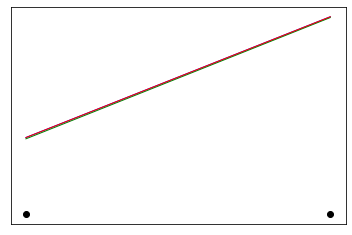

In [11]:
print("Normal linear regression:")
print_mean_squared_error(lr_mean_squared_error)
print_coefficient_of_determination(lr_r2_score)
print("\n")

print("Ridge regression:")
print_mean_squared_error(ridge_mean_squared_error)
print_coefficient_of_determination(ridge_r2_score)
print("\n")

print("Lasso regression:")
print_mean_squared_error(lasso_mean_squared_error)
print_coefficient_of_determination(lasso_r2_score)
print("\n")

plt.scatter(Xtest["Preperformance"], Ytest, color='black')
plt.plot(Xtest["Preperformance"], Ypred, color='blue', linewidth=1)
plt.plot(Xtest["Preperformance"], ridge_Ypred, color='green', linewidth=1)
plt.plot(Xtest["Preperformance"], lasso_Ypred, color='red', linewidth=1)
plt.xticks(())
plt.yticks(())
plt.show()

# Save model
Saves the choosen model(s) to a file to be used in the recommendation engine.

In [3]:
import pickle

# In the current state of recommendation engine, it is important to name the model after
# the program the data comes from. (i.e the name of the csv file in simulator/training_programs)
# Should probably make this automatic in some way.

filename = 'saved_model.sav'
# pickle.dump(ridge, open(filename, 'wb'))